# Map of active volcanoes

Here is an example of plotting a map of active volcanoes using data online at Oregon State University.  This example was written by Meghan Miller, of ANU.

<img src="images/volcano_map.png" width="50%"/>

At the end of this script you will produce a map just like the one shown here.


## Resources you will use. 

This notebook makes use of a couple of packages that might come in handy another time. The maps are made by `cartopy` which is a mapping tool written by the Meteorological Office in the UK (and which happens to be really good a plotting satellite data). The `pandas` package is a database tool that is really very good at manipulating tables of different types of data, selecting, sorting, refining and so on.

## Notes on the data source

The data that we are going to use come from [this web page](https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC) and you can see that this is a human-readable table, and the first of several pages.

We will show you how to read the first page, but you can also try this:

  - Can you figure out how to read the next one or two pages / all the pages ? (hint: click on the link and look at the url)
  - Can you see how to merge all the tables into one ? (hint: pandas has a `concat` function to combine a list of dataframes)


In [1]:
%matplotlib inline

import json

import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

chartinfo = 'Author: Meghan Miller | Data: Volcano World - volcano.oregonstate.edu'

In [2]:
import cartopy
cartopy.__version__

'0.24.0'

This next section reads the data from the Oregon State University database. This URL is actually a script to return the table of volcanoes in various forms. This is not a big issue as it returns a valid web page, but not every library that reads html is configured to work with these general URLs.

In [3]:
page_source = "https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC"

This function from the `pandas` package will read all the tables in a web page and turn them into dataframes.

In [4]:
tables = pd.read_html(page_source, storage_options={'User-Agent': 'Mozilla/5.0'})
print("There is/are {} table/s on this web page".format(len(tables)))

There is/are 1 table/s on this web page


In this case, it is not necessary to parse the various tables to find the one we want, but you would need to check (for example, the page header or footer might be in the form of a table to lay out the information but we don't want to use that for our map !)

In [5]:
df_volc = tables[0]
print(type(df_volc))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# pdurl = 'https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC'
# xpath = '//table'
# tree = html.parse(pdurl)
# tables = tree.xpath(xpath)

# table_dfs = []
# for idx in range(4, len(tables)):
#     df = pd.read_html(html.tostring(tables[idx]), header=0)[0]
#     table_dfs.append(df)

In [7]:
df_volc['Type'].value_counts()

Type
Stratovolcano         126
Caldera                20
Shield                 13
Complex                 8
Volcanic field          6
Submarine               5
Lava dome               3
Fissure vent            3
Caldera, Shield         2
Cinder Cone             2
Pyroclastic cone        2
Fissure vent, Maar      2
Flood Basalt            2
Plug                    1
Somma                   1
Maar                    1
Name: count, dtype: int64

Clean up the data to make sure the typos and missing information are not propogated into your database. This doesn't seem to be needed in this particular case, but, in other instances, you could use this technique to replace definitions / map to a new terminology etc.

In [8]:
def cleanup_type(s):
    if not isinstance(s, str):
        return s
    s = s.replace('?', '').replace('  ', ' ')
    s = s.replace('volcanoes', 'volcano')
    s = s.replace('volcanoe', 'Volcano')
    s = s.replace('cones', 'cone')
    s = s.replace('Calderas', 'Caldera')
    return s.strip().title()

df_volc['Type'] = df_volc['Type'].map(cleanup_type)
df_volc['Type'].value_counts()

Type
Stratovolcano         126
Caldera                20
Shield                 13
Complex                 8
Volcanic Field          6
Submarine               5
Lava Dome               3
Fissure Vent            3
Caldera, Shield         2
Cinder Cone             2
Pyroclastic Cone        2
Fissure Vent, Maar      2
Flood Basalt            2
Plug                    1
Somma                   1
Maar                    1
Name: count, dtype: int64

Now determine the number of volcanoes in the database.

In [9]:
df_volc.dropna(inplace=True)
len(df_volc)

195

Now select the volcanoes that are above sealevel

In [10]:
df_volc = df_volc[df_volc['Elevation (m)'] >= 0]
len(df_volc)

189

Make a nice table of the first 10 volcanoes from the information that you grabbed out of the Oregon State University website on volcanoes

In [11]:
print(len(df_volc))
df_volc.head(10)

189


,Volcano Name,Country,Type,Latitude (dd),Longitude (dd),Elevation (m)
0,Abu,Japan,Shield,34.50,131.60,641
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689
4,Adams,United States,Stratovolcano,46.21,-121.49,3742
6,Adatara,Japan,Stratovolcano,37.64,140.29,1718
7,Adwa,Ethiopia,Stratovolcano,10.07,40.84,1733
8,Afderà,Ethiopia,Stratovolcano,13.08,40.85,1295
9,Agrigan,Mariana Islands,Stratovolcano,18.77,145.67,965
10,Agua,Guatemala,Stratovolcano,14.47,-90.74,3760


Determine the number of each type of volcanoes from this list and output this information to the screen.

In [12]:
df_volc['Type'].value_counts()

Type
Stratovolcano         126
Caldera                19
Shield                 13
Complex                 8
Volcanic Field          6
Lava Dome               3
Fissure Vent            3
Caldera, Shield         2
Cinder Cone             2
Pyroclastic Cone        2
Fissure Vent, Maar      2
Plug                    1
Somma                   1
Maar                    1
Name: count, dtype: int64

In [13]:
df_volc.dropna(inplace=True)
len(df_volc)

/var/folders/bt/jsh174p911lcyp7hslpkzktc0000gn/T/ipykernel_44093/2615626174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volc.dropna(inplace=True)


189

In [14]:
df = df_volc[df_volc['Type'] == 'Stratovolcano']

Create a simple scatter plot map of the stratavolcanoes

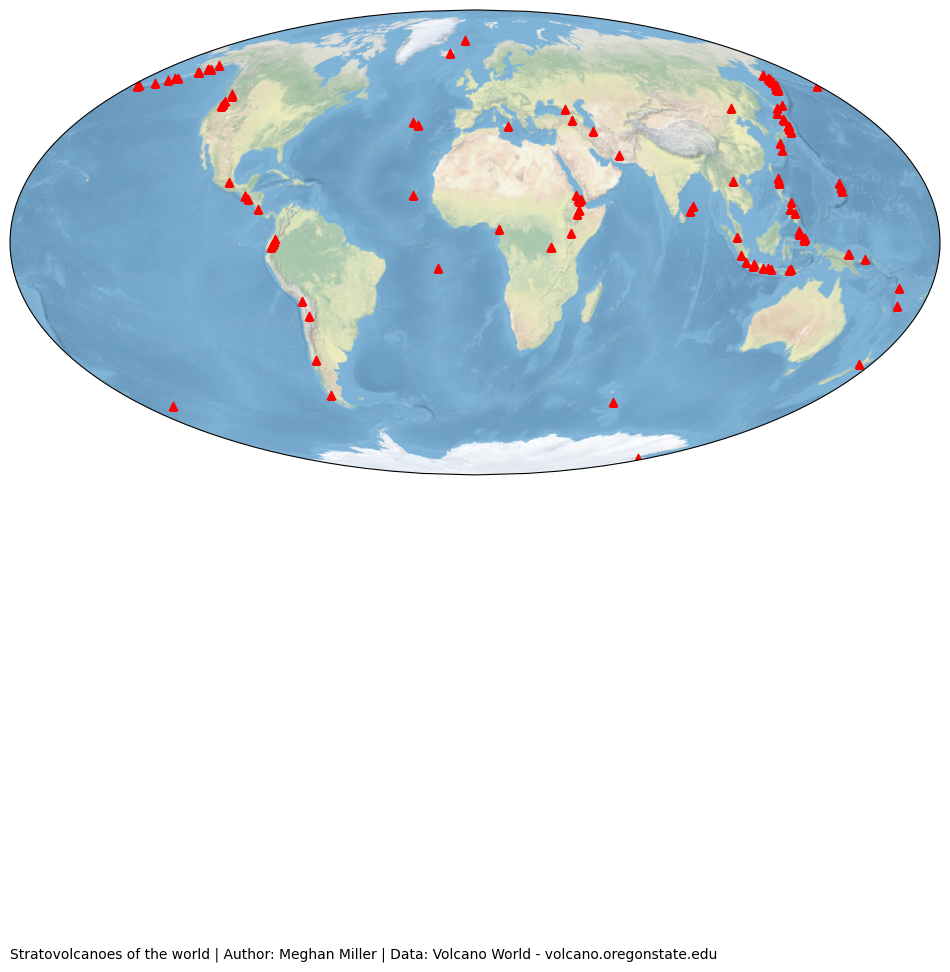

In [15]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mollweide())
ax.stock_img()
ax.annotate('Stratovolcanoes of the world | ' + chartinfo, xy=(0, -1.04), xycoords='axes fraction')
ax.scatter(df['Longitude (dd)'].array,df['Latitude (dd)'].array, color='red', linewidth=1, marker='^', transform=ccrs.PlateCarree())

plt.show()

## More volcanos

Can you complete the following to get a full map of ALL the volcanos ?

In [28]:
# Complete this !

## Make three tables from the three pages:

page_source = "https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC"

table0 = pd.read_html(page_source, storage_options={'User-Agent': 'Mozilla/5.0'})
print("There is/are {} table/s on the {} page".format(len(table0), page_source))

page_source = "https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC&page=1"

table1 = pd.read_html(page_source, storage_options={'User-Agent': 'Mozilla/5.0'})
print("There is/are {} table/s on the {} page".format(len(table1), page_source))

page_source = "https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC&page=2"

table2 = pd.read_html(page_source, storage_options={'User-Agent': 'Mozilla/5.0'})
print("There is/are {} table/s on the {} page".format(len(table2), page_source))

## Now concatenate them with pd.concat

df_volc_0 = table0[0]
...


## Now make the map 




There is/are 1 table/s on the https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC page
There is/are 1 table/s on the https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC&page=1 page
There is/are 1 table/s on the https://volcano.oregonstate.edu/volcano_table?sort_by=title&sort_order=ASC&page=2 page


,Volcano Name,Country,Type,Latitude (dd),Longitude (dd),Elevation (m)
0,Abu,Japan,Shield,34.50,131.60,641
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689
4,Adams,United States,Stratovolcano,46.21,-121.49,3742
...,...,...,...,...,...,...
30,Yellowstone,United States,Caldera,44.43,-110.67,2805
31,Zavaritzki Caldera,Russia,Caldera,46.93,151.95,624
32,Zheltovsky,Russia,NaN,51.57,157.32,1953
33,Zhupanovsky,Russia,NaN,53.59,159.15,2958


,Volcano Name,Country,Type,Latitude (dd),Longitude (dd),Elevation (m)
0,Abu,Japan,Shield,34.50,131.60,641
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689
4,Adams,United States,Stratovolcano,46.21,-121.49,3742
...,...,...,...,...,...,...
195,Koryaksky,Russia,Stratovolcano,53.32,158.69,3456
196,Koshelev,Russia,Stratovolcano,51.36,156.75,1812
197,Krafla,Iceland,Caldera,65.73,-16.78,818
198,Krakatau,Indonesia,Stratovolcano,-6.10,105.42,813
